# Project Part 1

## Team Info

### Project Title: The Nature of Crime and Law Enforcement in the U.S.

### Team Name: Crime Stoppers

### Team member names and PIDs:
* James Chaen Kwok - jchaenkwok
* Ryan Godfrey - rmgodfrey555
* Elliot Limanek - etlimanek
* Lauren Brennan - laurenbrennan
* Ryan Gallagher - rgallagher
* Nova (Elie) Tchuma - novahokie23

## Project Introduction

### Initial description of the project topic:
Our topic is about U.S. crime and the information we can discover by comparing different crime-related datasets.

### Potential research questions you plan to address:
Does law enforcement work?
Which law enforcement agencies are the most effective in terms of their budget/manpower? Federal? State? Local?
Demographics of crime, how demographics have changed? 
Geography of crime, use heatmaps laid over the U.S. to show crime dense areas and how those locations may change over time.
Which regions have the highest conviction rates? Do those regions have certain political sway or have larger law enforcemnt budgets? What programs other than law enforcement may prevent crime?
Can we accurately predict the types/number/locations of crimes using various different methods?



### Description of potential source data that would be relevant (including links or references if possible).
We've found multiple datasets contain crime statistics in various cities from Kaggle: https://www.kaggle.com/search?q=crime+dataset+in%3Adatasets. Most of the datasets provide the type of offense, the time of day, and location of the crime. There's also some data on hate crimes located here that seem interesting: https://data.world/ucr/2015-hate-crime-statistics.
The Department of Justice along with the FBI maintain multiple data sets on crime: https://bjs.ojp.gov/.
FBI: https://crime-data-explorer.fr.cloud.gov/pages/docApi.



# Project Part 2

This part focuses on obtaining and cleaning data on different aspects of crimes in 2020. We reported on our progress in visualizing, and analyzing said data. From part 1, we decided to identify who the most common offenders were by age, race, and sex. From there, we wanted to look at who whether or not law enforcement was effective. Additionally, we used crime statistics catgorized by states in the U.S. to see how they would break into clusters. Finally, we wanted to look at changes in the number of police in each state over time, which we may be able to relate to changes in overall crime rate, demographics of crime, or types of offenses commited

##Inital Findings

In [1]:
from IPython.core.pylabtools import figsize
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

#read the excel and csv files (Reimport files each time opening project doc)
offendersAgeType = pd.read_excel('Offenders_Adult_and_Juvenile_Age_Category_by_Offense_Category_2020.xls.xlsx')
offendersRace = pd.read_excel('Offenders_Race_by_Offense_Category_2020.xls.xlsx')
offendersSex = pd.read_excel('Offenders_Sex_by_Offense_Category_2020.xls.xlsx')
employment = pd.read_csv('law_enforcement_employment.csv')
stateCode = pd.read_csv("states.csv")

**Cleaning the data sets**

The original data set had extra unnecessary information so we want to create new data frames for each set.

In [2]:
#clean df's to have only relevant info
def clean1(df):
  df = df.replace(to_replace = r'\n', value = ' ', regex=True)
  df.columns = df.iloc[4]
  df.columns.name = ""
  df.index = df.iloc[:, 0]
  df = df.iloc[4:32]
  df = df.iloc[1:, 1:]
  return df
offendersAgeType = clean1(offendersAgeType)
offendersRace = clean1(offendersRace)
offendersSex = clean1(offendersSex)
#cleaning the employment dataset
employment = pd.DataFrame(employment).dropna().reset_index(drop=True)
stateCode = pd.DataFrame(stateCode)
stateCode.columns = ["name", 'code', 'state_postal_abbr']
stateCode['state_postal_abbr'] = stateCode['state_postal_abbr'].str.strip()
employment['state_postal_abbr'] = employment['state_postal_abbr'].str.strip()


**Merging the data frames together**

We want to be able to use the data from the different sets so a merge of the first two sets are executed first. Then the last set is merged with the set that is already merged.

In [3]:
#merge df's together then clean to remove duplicate data/make df visually 
#appealing
halfMerged = pd.merge(offendersAgeType, offendersRace)
halfMerged.index = offendersAgeType.index
halfMerged = halfMerged.drop(['nan_x', 'nan_y'], axis=1)
fullMerge = halfMerged.join(offendersSex, lsuffix = " ")
fullMerge['Total'] = fullMerge['nan ']
fullMerge['Juvenile'] = fullMerge['Juvenile2']
fullMerge = fullMerge.drop(['nan'], axis = 1)
columnsList = list(fullMerge.columns)
columnsList[0], columnsList[13] = columnsList[13], columnsList[0]
columnsList[2], columnsList[14] = columnsList[14], columnsList[2]
fullMerge.columns = columnsList
fullMerge = fullMerge.drop(['nan ', 'Juvenile2'], axis = 1)
fullMerge = fullMerge.fillna(0)
display(fullMerge)
#merging state and employment data
employment = pd.merge(employment, stateCode, on='state_postal_abbr')


,Total,Adult,Juvenile,Unknown Age,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Unknown Race,Male,Female,Unknown Sex
Offense Category,,,,,,,,,,,,,
Total,7173072,5350030,494379,1328663,3642932,2122038,83161,58063,15391,1251487,4451194,1737987,983891
Crimes Against Persons,2082672,1764896,171481,146295,1134914,769955,25873,19864,6161,125905,1468339,555929,58404
Assault Offenses,1916007,1637423,149061,129523,1037246,722340,23948,18007,5697,108769,1322054,541137,52816
Homicide Offenses,13169,10427,895,1847,4945,6285,142,80,34,1683,10191,1606,1372
Human Trafficking,1526,1266,58,202,666,611,13,31,7,198,1192,250,84
Kidnapping/Abduction,31672,28380,953,2339,17800,11271,496,312,151,1642,25481,5650,541
Sex Offenses,120298,87400,20514,12384,74257,29448,1274,1434,272,13613,109421,7286,3591
Crimes Against Property,3536809,2157314,228799,1150696,1491218,913641,34741,26656,6667,1063886,1858145,775926,902738
Arson,15675,9755,2204,3716,7989,3406,190,145,32,3913,9656,2662,3357


>**Break the data into the categories of Crimes Against People, Properties and Society**

We want to look at the different crime categories so having data frames with the specific categorical data is beneficial.

In [4]:
#create df of Crimes Against Persons data excluding totals
caPDF = fullMerge.iloc[2:7, 1:]
#create df of Crimes Against Persons data including totals
totalCapDF = fullMerge.iloc[1:7, 0:]
#create df of Crimes Against Property data excluding totals
caPropDF = fullMerge.iloc[8:20, :]
#create df of Crimes Against Property data including totals
totalCaPropDF = fullMerge.iloc[7:20, 0:]
#create df of Crimes Against Society data excluding totals
caSocDF = fullMerge.iloc[21:, 1:]
#create df of Crimes Against Society data including totals
totalCaSocDF = fullMerge.iloc[20:, 0:]

>**Create stacked bar graphs**

We want to see how race, sex, and age affect crimes committed. Stacked bar graphs are a good first step to looking at the breakdown of if there is a trend among crimes and who commits them.

In [5]:
#create stacked bar graphs for each respective crime category
def getColumns(col):
    adult = col.plot(x=col.get(col.iloc[0]), kind='bar',
        ylabel='Number of Offenses', stacked=True, figsize=(20,10))
    return adult

>**Displaying the bar graphs showing how race, sex, and age affects crimes against people**

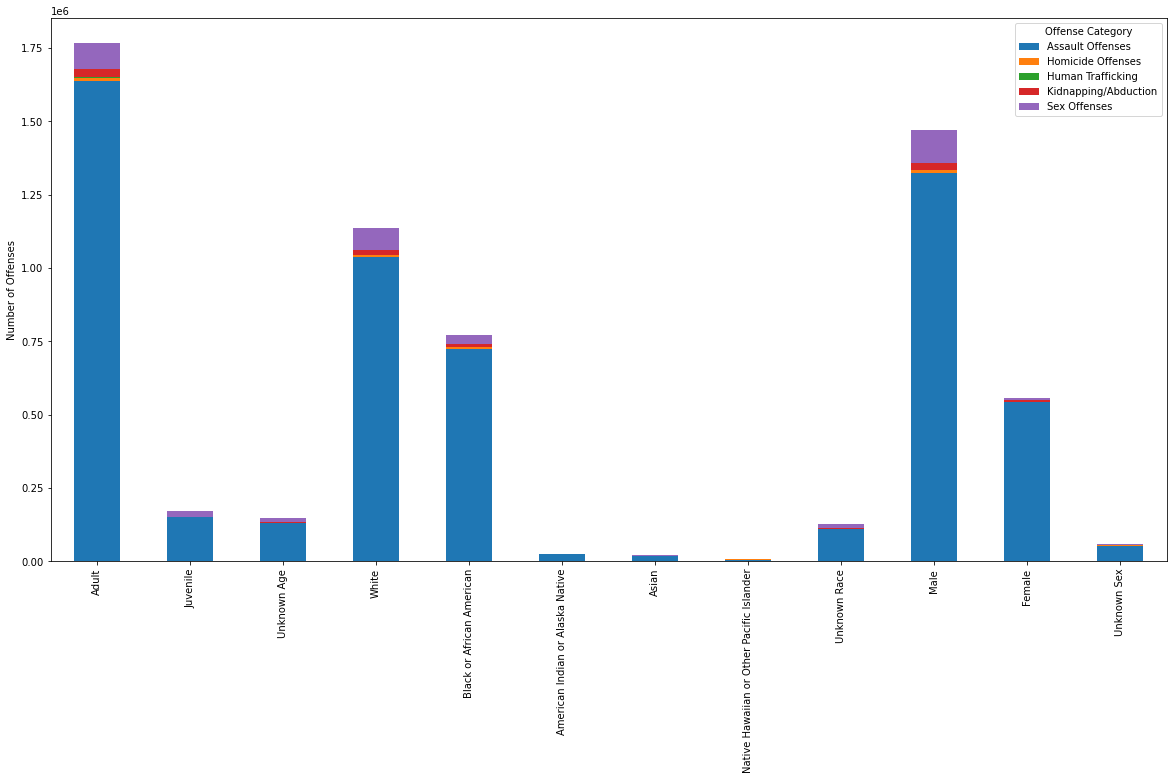

In [6]:
persons = getColumns(caPDF.transpose())

>**Displaying the bar graphs showing how race, sex, and age affects crimes against property**

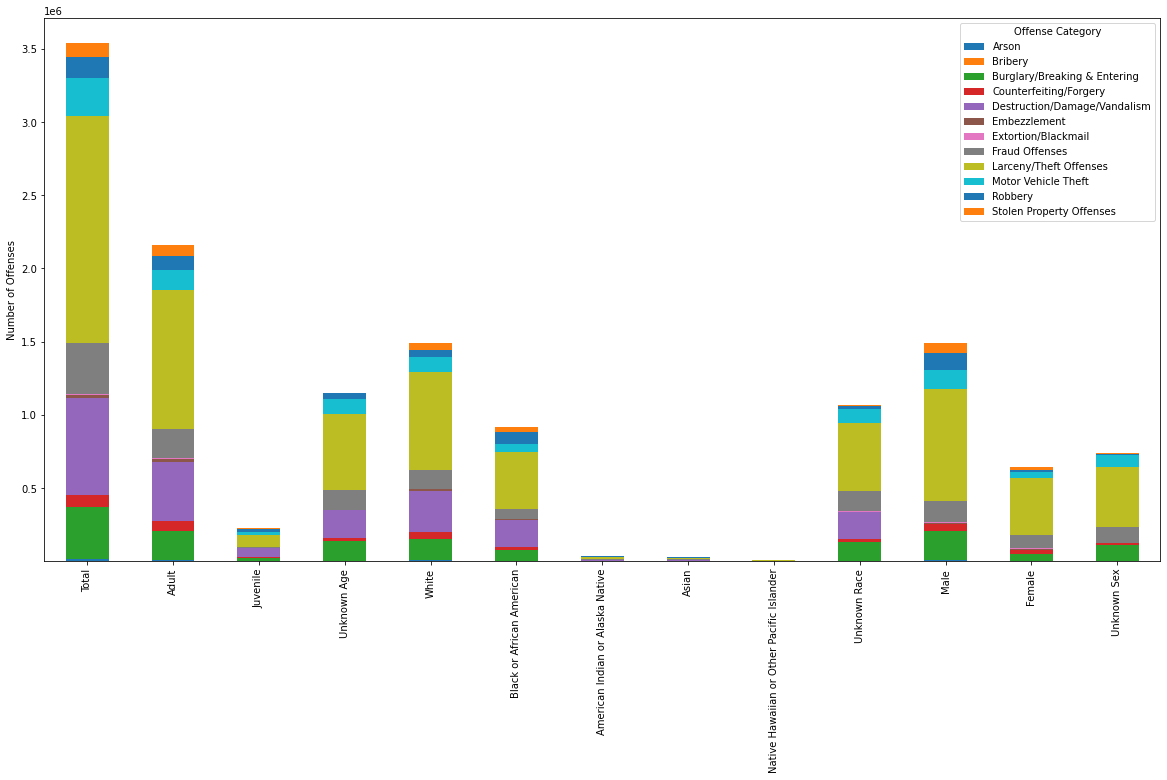

In [7]:
prop = getColumns(caPropDF.transpose())

> **Displaying the bar graphs showing how race, sex, and age affects crimes against society**



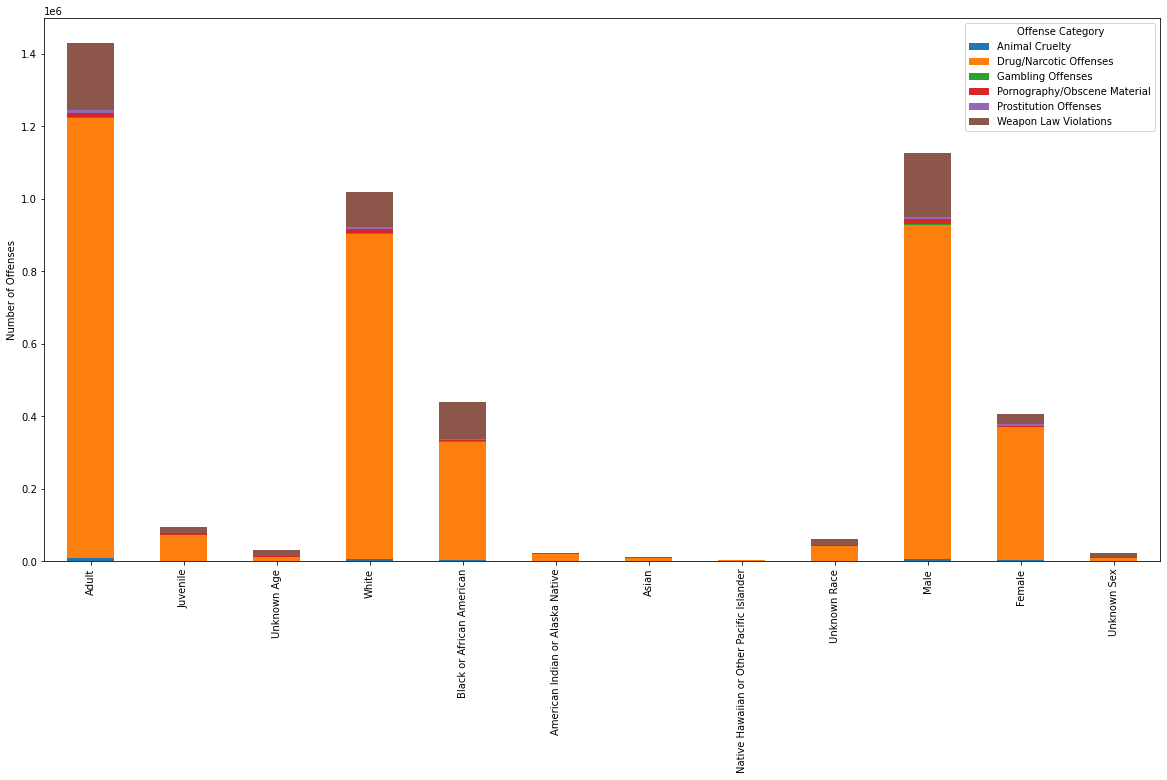

In [8]:
society = getColumns(caSocDF.transpose())

**Visualizing law enforcement employment statistics**

Seaborn regplot looking at aggregate change in the police force throughout the US, uses ratio of police per 100 citizens

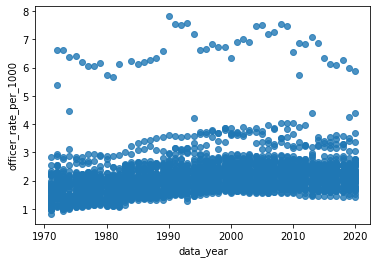

In [9]:

employmentReg = seaborn.regplot(x=employment["data_year"], y= employment['officer_rate_per_1000'])

Seaborn linegraph depicting change in police in each state

81286.0


<AxesSubplot:xlabel='data_year', ylabel='officer'>

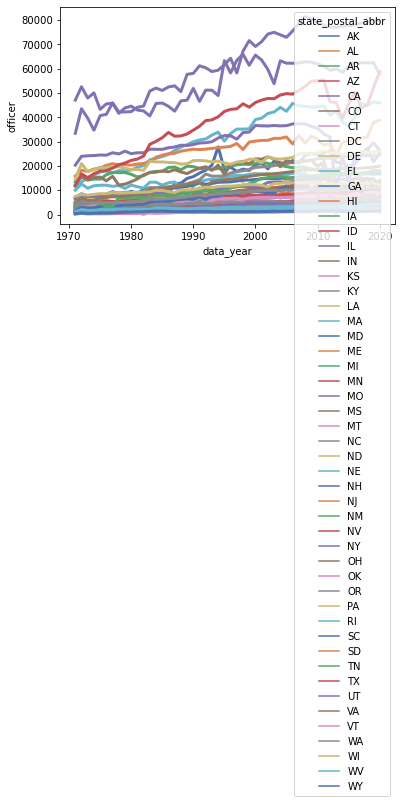

In [10]:

plot2 = seaborn.lineplot(x=employment["data_year"], y= employment['officer'], hue=employment["state_postal_abbr"], palette="deep", linestyle = '-', linewidth = 3)
print(employment["officer"].max())

plot2

>**Display subsets of the merged data frame based on the crime category**

Based on the bar graphs, we can see that the American Indian/Native Alaska, Asian, and Native Hawaiian or Other Pacific Island races do not commit much crime in comparison to the others. So we displayed the data frames used to generate each bar graph in order to show the specific information.

In [11]:
#displays the data for crimes against people
display(totalCapDF)

,Total,Adult,Juvenile,Unknown Age,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Unknown Race,Male,Female,Unknown Sex
Offense Category,,,,,,,,,,,,,
Crimes Against Persons,2082672,1764896,171481,146295,1134914,769955,25873,19864,6161,125905,1468339,555929,58404
Assault Offenses,1916007,1637423,149061,129523,1037246,722340,23948,18007,5697,108769,1322054,541137,52816
Homicide Offenses,13169,10427,895,1847,4945,6285,142,80,34,1683,10191,1606,1372
Human Trafficking,1526,1266,58,202,666,611,13,31,7,198,1192,250,84
Kidnapping/Abduction,31672,28380,953,2339,17800,11271,496,312,151,1642,25481,5650,541
Sex Offenses,120298,87400,20514,12384,74257,29448,1274,1434,272,13613,109421,7286,3591


In [12]:
#displays the data for crimes against property
display(totalCaPropDF)

,Total,Adult,Juvenile,Unknown Age,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Unknown Race,Male,Female,Unknown Sex
Offense Category,,,,,,,,,,,,,
Crimes Against Property,3536809,2157314,228799,1150696,1491218,913641,34741,26656,6667,1063886,1858145,775926,902738
Arson,15675,9755,2204,3716,7989,3406,190,145,32,3913,9656,2662,3357
Bribery,691,626,21,44,511,113,7,9,2,49,468,198,25
Burglary/Breaking & Entering,352844,197453,22798,132593,145278,76122,3086,2062,495,125801,197115,46863,108866
Counterfeiting/Forgery,84308,63758,1301,19249,44535,19495,838,882,135,18423,45496,25899,12913
Destruction/Damage/Vandalism,663771,409097,63372,191302,282567,182124,6265,4844,840,187131,0,0,0
Embezzlement,20438,18442,789,1207,11428,6974,195,211,41,1589,10415,9520,503
Extortion/Blackmail,5661,2599,180,2882,2012,649,21,126,12,2841,2264,1636,1761
Fraud Offenses,344021,202802,7733,133486,129465,68102,2667,4019,468,139300,147129,88692,108200


In [13]:
#displays the data for crimes against society
display(totalCaSocDF)

,Total,Adult,Juvenile,Unknown Age,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Unknown Race,Male,Female,Unknown Sex
Offense Category,,,,,,,,,,,,,
Crimes Against Society,1553591,1427820,94099,31672,1016800,438442,22547,11543,2563,61696,1124710,406132,22749
Animal Cruelty,10414,8834,335,1245,6442,2468,76,117,25,1286,5964,3609,841
Drug/Narcotic Offenses,1295689,1213705,70925,11059,896430,327343,20572,8844,1861,40639,921613,365369,8707
Gambling Offenses,2122,1999,48,75,925,442,13,304,210,228,1495,570,57
Pornography/Obscene Material,21137,11933,6348,2856,13469,3723,118,271,29,3527,15055,4100,1982
Prostitution Offenses,8998,8673,118,207,4722,3350,56,532,42,296,4289,4636,73
Weapon Law Violations,215231,182676,16325,16230,94812,101116,1712,1475,396,15720,176294,27848,11089


Along with looking at agreggate instances of crime, we also want to look at the law enforcement measures taken to prevent crime. The data set provided includes total number of officers per state from 1971 through 2020. It also includes data about the poopulation of the state and ratio of officers to civilians.

In [14]:
#displays employment data datframe
display(employment)

,state_postal_abbr,data_year,officer,officer_rate_per_1000,civilian_count,civilian__rate_per_1000,population,name,code
0,AK,1971,230.0,2.259998,83.0,0.815565,101770,Alaska,2
1,AK,1972,457.0,1.417665,165.0,0.511849,322361,Alaska,2
2,AK,1973,290.0,2.337729,93.0,0.749686,124052,Alaska,2
3,AK,1974,341.0,2.344561,118.0,0.811314,145443,Alaska,2
4,AK,1975,357.0,2.012719,127.0,0.716009,177372,Alaska,2
...,...,...,...,...,...,...,...,...,...
2540,WY,2016,1253.0,2.278766,686.0,1.247593,549859,Wyoming,56
2541,WY,2017,1243.0,2.253669,782.0,1.417835,551545,Wyoming,56
2542,WY,2018,1490.0,2.867795,833.0,1.603270,519563,Wyoming,56
2543,WY,2019,1409.0,2.543271,854.0,1.541486,554011,Wyoming,56


> **Analyzing the Data**

When looking at this data it is fairly obvious to see that White Adult Males are responsible for most crime. The demographic for the people who commit the most crimes is adult males which fits with many stereotypes. However one key is to look at how the race has been distributed. We have Black/African American, White, Native American, Asian, Native Hawaiian and undisclosed. One might look at this data and immediately think, "So White men and African American men make up most crime, they must be dangerous." However this data is taken extremely out of context. It will require much further analysis. First off, we have total numbers of offenders by race, not percentages of offenders by race. One thing we need to get access of is the race distribution of just people in America. Obviously, we know that the majority in America are White people, and Black/African American but further data will help us to generate a more accurate analysis. Another important detail is the breakdown of origin within race. Many surverys combine people of Latin, and Hispanic origin in with people of European, Australian and some African origin. The same can be said about the majority of races on this list. Another key in this data is we lack the context of what kinds of communities these crimes are committed. In America, there are places with lower living conditions and higher crime rates where not all crime is reported, and in these areas the race distribution can be vastly different. It is important that moving forward we take a look at these areas and see how the crime rate increases or decreases with the population, race distribution, wealth, and the amount of law enforcement.

To address one of our contextual issues with our data, we did some initial work looking at aggreagte numbers of police in the US and the trend of the police/civilian ratio. It is clear from our regression plot that the police/civilian ratio is increasing. However, amongst that graph lay several outliers, where the number was much higher; this may point to certain areas of over policing. More investigation is required.



In addition to the above analysis, we also analyzed reported crimes in each state in the States_Crime_Analysis notebook (too much stuff to copy over). There were three categories of crime (persons, society, property), each of which were a data set. Assault was the most common offense against persons, theft the most common against property, and drugs the most common against society. Each of these three categories led across every cross-reference in their respective tables. Pointing these results out depending on the data could help with looking for a lead into policing strategy and criminology. We also decided to look at how each state compares in terms of offenses and which states are alike. All the code and visuals for the this analysis are included in the other notebook (it was just too much to copy and paste over). To start, we clustered the states using k-means (with four clusters). Once we plotted the states and clusters, we noticed that there was a pretty obivous outlier: Texas. Looking back at the data, Texas had the most reported incidents by a whole digit and had the most crimes in almost every catergory compared to other states. Seeing this, we used DBSCAN to determine if there were any other potential outliers and found Hawaii, Indianna, Georgia, South Carolina, North Carolina were outliers with Colorado potentially being another. 

We decided to only remove Texas since the other clusters still we were hoping the other outliers would form their own cluster or be better fit to new clusters. In hindsight, this didn't happen, but more on this later. We redid k-means without Texas with three and four clusters. In the three cluster variation, every state was in the same cluster except for Nevada, which moved from cluster 1 to cluster 0. In the four cluster variation, half cluster 0 and a few states from cluster 1 formed their own new cluster. It seemed that there was some indecision and that the states in the new cluster could go in both.

However, looking at new k-means reveals some distinct regions, especially in the three cluster variation's map. Just looking at the map images shows regions such as Northeast, East, Southeast, Central, West, Southwest, and whatever Montana is in, can be formed.

Datasets were obtained using the Federal Bureau of Investigation's Crime Data Explorer(CDE). CDE is an api open to the public that maintains data on crime, law enforcement employment, clearences, use-of-force, and even law enforcement suicides. 

## Procedural Section

We didn't really change much from part 1. We felt that we had a wide range of questions to choose from and our topic stayed the same. However, for some of our questions, we worked backwards by starting with the data, analyzing it using various techniques and then figuring out which questions were answered. We consideredusing pie charts instead of bar graphs, but that would have entailed  

## Individual Contributions
*   James Chaen Kwok: Analyzed crime statistics (from three datasets) relating to each state. Performed k-means clustersing on the datasets and DBSCAN to find clusters and see which states are similar to each other in terms of overall crime.
*   Ryan Godfrey: Did analysis of the data sets created by Lauren, and posed more questions for further analysis with these data sets and pointed out the need for datasets with more context.
*   Elliot Limanek:
*   Lauren Brennan: Cleaned and merged 3 data sets into one dataframe focussing on crimes, their categories, and the race/sex/age of people who commit them. Created stacked bar graphs for the different crimes on people, properties, and society. 
*   Ryan Gallagher: Worked with law enforcement employment data, merging two data sets and doing some visualizations of employment data. Worked on analysis section. Obtained access to FBI CDE and provided data sets in excel/csv format.
*   Nova (Elie) Tchuma: Wrote additional analysis to datasets along with possible real-world benefits our research could provide.

# Project Part 3

Project Part 3 is the finale, and focuses on the second pass through the data science process. You will report on your final results of the Project, which should now include at least two cycles of the data science process.

You should build on the progress you made in Part 2 (and your submission for Part 3 should build on the project notebook that you created for Part 2). However, since data science is an iterative cyclical process, you are free to revisit earlier steps and revise earlier code from Part 2 as needed.  Your goal is to produce a clear and convincing QQQ report of insightful findings, that are well justified, and make use of visuals to convey the message.  The overall project requirements are copied below.

## Further Analysis
>After answering our initial research questions with analysis and visualization, we generated new questions based upon those results, and then answered those new questions with further analysis and visualization.

**Question**
>How did race influence crime rates in the United States based on the population in 2020?

Note: The total of all race categories alone or in combination is equal to the number of responses; therefore it adds to more than the total population which was 331,449,281 according to the 2020 census. The alone column correctly adds up the total population.

In [17]:
# clean data from excel file to create data frame with relevant information
# this data frame contains the populations of different races in the US
# according to the 2020 census
raceCensus = pd.read_excel('redistricting-supplementary-table-01.xlsx')
raceCensus = pd.DataFrame(raceCensus)
raceCensus = raceCensus.iloc[2:10]
raceCensus.index = raceCensus.iloc[:, 0]
raceCensus = raceCensus.fillna('Race')
raceCensus.columns = raceCensus.iloc[0]
raceCensus = raceCensus.iloc[1:]
raceCensus.columns.name = ""
raceCensus.index.name=""
raceCensus = raceCensus.iloc[:, 4:7]
# for better visualization, change the 'alone or in combination' column to
# be named Total Responses
raceCensus['Total Responses'] = raceCensus['Alone or in combination']
raceCensus = raceCensus.drop(['Alone or in combination'], axis = 1)
raceCensus
# use this data to figure out percentage of crimes committed per race
# use some other race as unknown 
# ignore 2 or more races??

,Alone,In combination,Total Responses
,,,
White,204277273,31134234,235411507
Black or African American,41104200,5832533,46936733
American Indian and Alaska Native,3727135,5938923,9666058
Asian,19886049,4114949,24000998
Native Hawaiian and Other Pacific Islander,689966,896497,1586463
Some Other Race,27915715,21986821,49902536
Two or More Races,33848943,X,X


In [20]:
#In this section we will be displaying the percentage of Races who commit crimes vs the total population of their race
CAPWhitePer = totalCapDF.iloc[:1].White[0] / raceCensus.iloc[:1].Alone * 100
CAPWhitePer
CAPBAAPer = totalCapDF["Black or African American"].iloc[:1][0] / raceCensus.iloc[1:2].Alone * 100
CAPBAAPer
CAPAIANPer = totalCapDF["American Indian or Alaska Native"].iloc[:1][0] / raceCensus.iloc[2:3].Alone * 100
CAPAIANPer 
CAPAPer = totalCapDF["Asian"].iloc[:1][0] / raceCensus.iloc[3:4].Alone * 100
CAPAPer 
CAPNHOPIPer = totalCapDF["Native Hawaiian or Other Pacific Islander"].iloc[:1][0] / raceCensus.iloc[4:5].Alone * 100
CAPNHOPIPer 
totals = [CAPWhitePer[0], CAPBAAPer[0], CAPAIANPer[0], CAPAPer[0], CAPNHOPIPer[0]]
totals
t = {"Crimes Against Persons Percentages" : totals}
CAPDFPer = pd.DataFrame(t)
CAPDFPer
indexes = ["White", "Black or African American", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander"]
CAPDFPer["Races"] = indexes
CAPDFPer.set_index("Races")

,Crimes Against Persons Percentages
Races,
White,0.555575
Black or African American,1.873178
American Indian or Alaska Native,0.694179
Asian,0.099889
Native Hawaiian or Other Pacific Islander,0.892943


In [21]:
CAPropWhitePer = totalCaPropDF.iloc[:1].White[0] / raceCensus.iloc[:1].Alone * 100
CAPropWhitePer
CAPropBAAPer = totalCaPropDF["Black or African American"].iloc[:1][0] / raceCensus.iloc[1:2].Alone * 100
CAPropBAAPer
CAPropAIANPer = totalCaPropDF["American Indian or Alaska Native"].iloc[:1][0] / raceCensus.iloc[2:3].Alone * 100
CAPropAIANPer 
CAPropAPer = totalCaPropDF["Asian"].iloc[:1][0] / raceCensus.iloc[3:4].Alone * 100
CAPropAPer 
CAPropNHOPIPer = totalCaPropDF["Native Hawaiian or Other Pacific Islander"].iloc[:1][0] / raceCensus.iloc[4:5].Alone * 100
CAPropNHOPIPer 
totals = [CAPropWhitePer[0], CAPropBAAPer[0], CAPropAIANPer[0], CAPropAPer[0], CAPropNHOPIPer[0]]
totals
t = {"Crimes Against Property Percentages" : totals}
CAPropDFPer = pd.DataFrame(t)
CAPropDFPer
indexes = ["White", "Black or African American", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander"]
CAPropDFPer["Races"] = indexes
CAPropDFPer.set_index("Races")

,Crimes Against Property Percentages
Races,
White,0.729997
Black or African American,2.222744
American Indian or Alaska Native,0.932110
Asian,0.134044
Native Hawaiian or Other Pacific Islander,0.966279


In [22]:
CASWhitePer = totalCaSocDF.iloc[:1].White[0] / raceCensus.iloc[:1].Alone * 100
CASWhitePer
CASBAAPer = totalCaSocDF["Black or African American"].iloc[:1][0] / raceCensus.iloc[1:2].Alone * 100
CASBAAPer
CASAIANPer = totalCaSocDF["American Indian or Alaska Native"].iloc[:1][0] / raceCensus.iloc[2:3].Alone * 100
CASAIANPer 
CASAPer = totalCaSocDF["Asian"].iloc[:1][0] / raceCensus.iloc[3:4].Alone * 100
CASAPer 
CASNHOPIPer = totalCaSocDF["Native Hawaiian or Other Pacific Islander"].iloc[:1][0] / raceCensus.iloc[4:5].Alone * 100
CASNHOPIPer 
totals = [CASWhitePer[0], CASBAAPer[0], CASAIANPer[0], CASAPer[0], CASNHOPIPer[0]]
totals
t = {"Crimes Against Society Percentages" : totals}
CASDFPer = pd.DataFrame(t)
CASDFPer
indexes = ["White", "Black or African American", "American Indian or Alaska Native", "Asian", "Native Hawaiian or Other Pacific Islander"]
CASDFPer["Races"] = indexes
CASDFPer.set_index("Races")

,Crimes Against Society Percentages
Races,
White,0.497755
Black or African American,1.066660
American Indian or Alaska Native,0.604942
Asian,0.058046
Native Hawaiian or Other Pacific Islander,0.371468


<AxesSubplot:ylabel='Crimes Against Persons Percentages'>

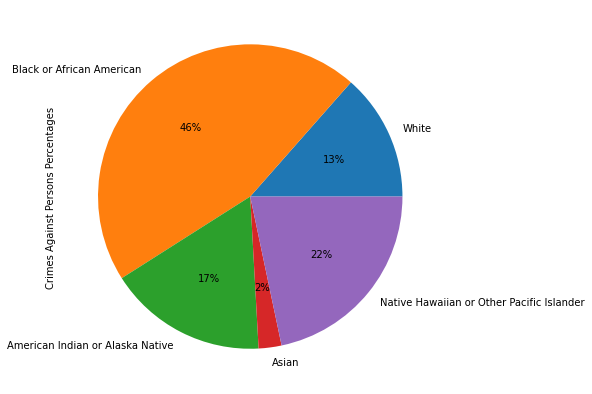

In [40]:
#The dataframes show the density of the population, that is the percentage of the race that commits crimes
#The Pie chart is showing the percentages between densities, or how much the races compare to each other
CAPDFPer["Crimes Against Persons Percentages"].plot(kind='pie', autopct='%1.0f%%', labels=CAPDFPer.Races,figsize=(15, 7))

<AxesSubplot:ylabel='Crimes Against Property Percentages'>

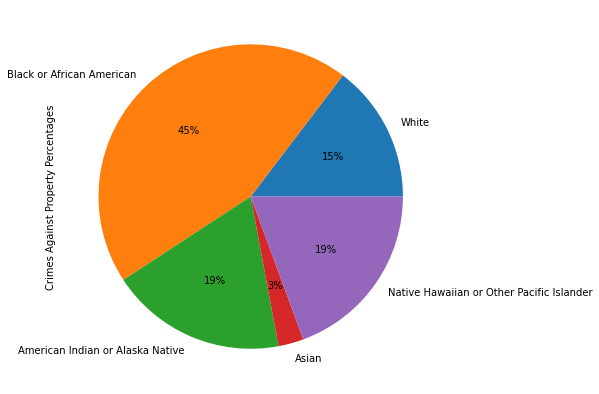

In [41]:
CAPropDFPer["Crimes Against Property Percentages"].plot(kind='pie', autopct='%1.0f%%', labels=CAPropDFPer.Races,figsize=(15, 7))

<AxesSubplot:ylabel='Crimes Against Society Percentages'>

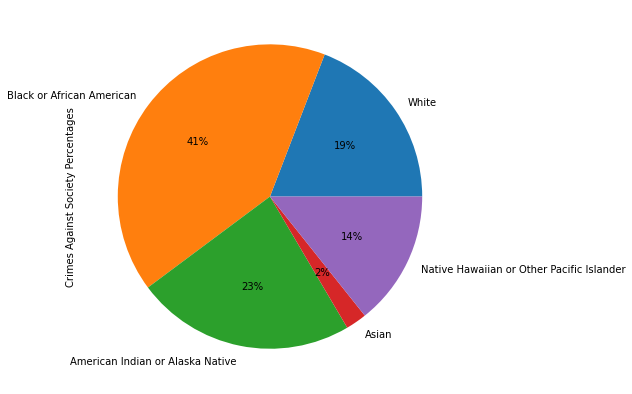

In [39]:
CASDFPer["Crimes Against Society Percentages"].plot(kind='pie', autopct='%1.0f%%', labels=CASDFPer.Races, figsize=(15, 7))

### Another way
We wanted to see if there is a connection between states with higher percent of some race vs the type of crime that is commited there. 

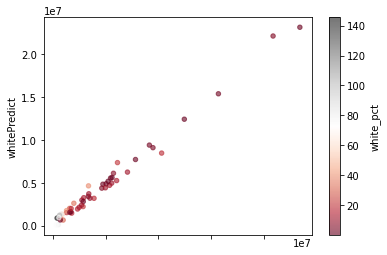

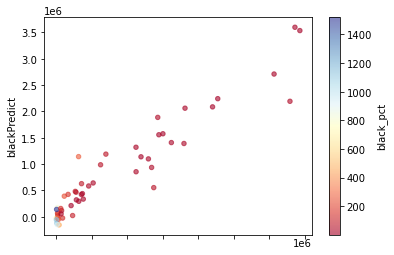

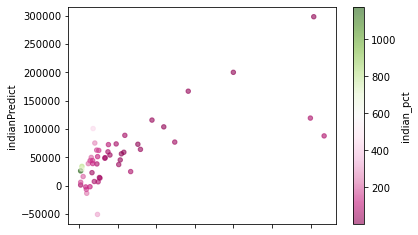

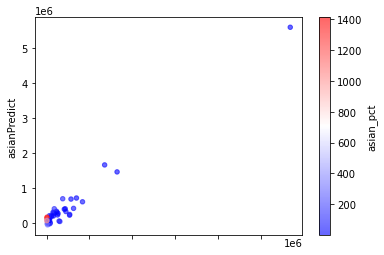

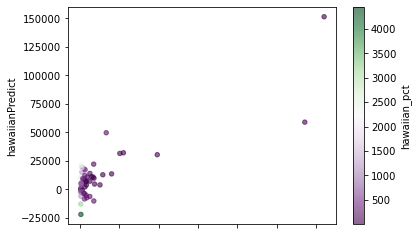

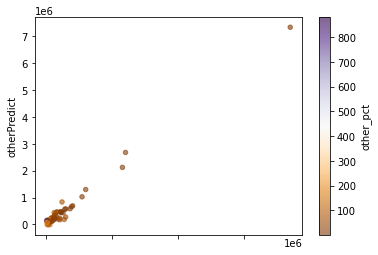

In [44]:
from sklearn.linear_model import LinearRegression


data = pd.read_csv('state_crime.csv')
race = pd.read_csv('csvDataTotals.csv')

data
data2 = data.loc[data['Year'] == 2017]

withRace = data2.merge(race, on='State')

withRace = withRace.drop("Total", axis=1)

x = withRace.iloc[:,2:].corr()

reg = LinearRegression()

X = withRace.iloc[:,3:21]

Y = withRace.iloc[:,21:]

reg.fit(X,Y)


withRace1 = reg.predict(X)


q = pd.DataFrame(withRace1, columns=['whitePredict', 'blackPredict', 'indianPredict', 'asianPredict', 'hawaiianPredict', 'otherPredict'])
q = round(q)

q['State'] = withRace.State


final = withRace.merge(q, on="State")

final['white_pct'] = abs((final.WhiteTotal-final.whitePredict)/final.WhiteTotal)*100

final['black_pct'] = abs((final.BlackTotal-final.blackPredict)/final.BlackTotal)*100

final['indian_pct'] = abs((final.IndianTotal-final.indianPredict)/final.IndianTotal)*100
final['asian_pct'] = abs((final.AsianTotal-final.asianPredict)/final.AsianTotal)*100
final['hawaiian_pct'] = abs((final.HawaiianTotal-final.hawaiianPredict)/final.HawaiianTotal)*100
final['other_pct'] = abs((final.OtherTotal-final.otherPredict)/final.OtherTotal)*100



final

ax = final.plot.scatter(x='WhiteTotal', y='whitePredict', c='white_pct', colormap='RdGy', alpha = .6)

ax2 = final.plot.scatter(x='BlackTotal', y='blackPredict', c='black_pct', colormap= 'RdYlBu', alpha= .6)

ax3 = final.plot.scatter(x='IndianTotal', y='indianPredict', c='indian_pct', colormap='PiYG', alpha=.6)

ax3 = final.plot.scatter(x='AsianTotal', y='asianPredict', c='asian_pct', colormap='bwr', alpha=.6)
ax3 = final.plot.scatter(x='HawaiianTotal', y='hawaiianPredict', c='hawaiian_pct', colormap='PRGn', alpha=.6)

ax3 = final.plot.scatter(x='OtherTotal', y='otherPredict', c='other_pct', colormap='PuOr', alpha=.6)

### Summary of above findings
We have seen which races lead commit the most type of crimes. An obvious follow up question would be if there is correlation between the crime commited and the race of those commiting them. One way to find this is through a Linear Regression, this tells us if there is correlation between to sets of values and allows us to predict values through them.

I am attempting to predict the population of races based on the crimes commited in every state. In some cases its is shcokinly accurate. For example the white_pct prediction is only .3 percent off the actual number of white citizens who live in that state. In other cases it is far less accurate, in Idaho the black population prediction is 1000 percent off.

This is a very dangerous propsistion for the world, from an ethics standpoint predicting race based off crimes could be incredibly dangerous. Predictive policing can be tricky to rely on simply because it cannot measure and account for every variable, while also overstating the ones it can. The data is produced by analyzing localities, and there are a multitude of factors that explain the population of any locale. Attempting to draw any conclusion from this would be generalizing, a conduit to justifying prejudice.

### Further Analysis of LEO Employment Data

**Question:** After understanding the change of LEO employmentment per capita, are rising police per capita levels related to increases in violent crime rates.

  Our previous data sets possesed great specificty over a period of one year, for this analysis I required a broader dataset with year by year data. I used a CORGIS Crime Data dataset that is constructed using the same information from the FBI CDE system.

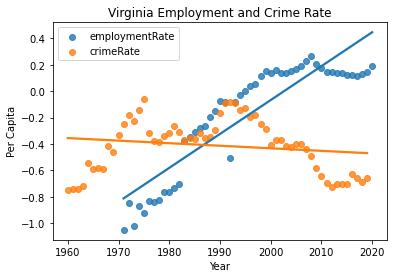

In [43]:
stateCrime = pd.read_csv("state_crime.csv")
stateCrime = pd.DataFrame(stateCrime)
'''
I wanted to focus on instances of violent crime so I normalized data realated to all violent crimes;
I also normalized LEO employment data percaptia to allow our visualization to work properly.
'''
stateCrime["Data.Rates.Violent.All"] = (stateCrime["Data.Rates.Violent.All"] - stateCrime["Data.Rates.Violent.All"].mean()) / stateCrime["Data.Rates.Violent.All"].std()
employment['officer_rate_per_1000'] = (employment['officer_rate_per_1000'] - employment['officer_rate_per_1000'].mean()) / employment['officer_rate_per_1000'].std()

'''
Lets first look at our home state Virginia, we live and go to school here after all!
'''
virginiaEmploy = employment[employment["state_postal_abbr"] == "VA"]
virginiaCrime = stateCrime[stateCrime["State"] == "Virginia"]

regVA = seaborn.regplot(x=virginiaEmploy["data_year"], y= virginiaEmploy['officer_rate_per_1000'],fit_reg=True, ci=None, label='employmentRate')
regVA = seaborn.regplot(x = virginiaCrime["Year"], y = virginiaCrime["Data.Rates.Violent.All"],fit_reg=True, ci=None, label='crimeRate')
regVA.set(ylabel='Per Capita', xlabel='Year', title = "Virginia Employment and Crime Rate")
regVA.legend()

Our K-Means analysis in our previous part here can lend a hand in determining this relationship regionally. Our analyisis found 3 clusters amongst our crime data for 2020. Picking the states closest to the mean of each cluster i selected Maryland, Minnesota, and Ohio. These kmeans suffer from variance when the k-mean is repeated, but these states were consistantly bear the mean and provide large enough datasets to work off of.

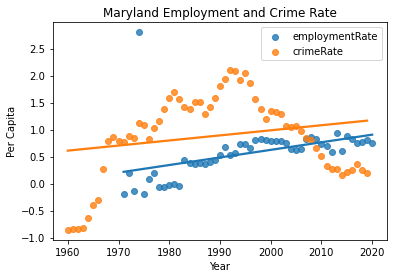

In [32]:
marylandEmploy = employment[employment['state_postal_abbr'] == "MD"]
marylandCrime = stateCrime[stateCrime['State'] == "Maryland"]

regMD = seaborn.regplot(x= marylandEmploy["data_year"], y= marylandEmploy['officer_rate_per_1000'],fit_reg=True, ci=None, label='employmentRate')
regMD =seaborn.regplot(x = marylandCrime["Year"], y = marylandCrime["Data.Rates.Violent.All"],fit_reg=True, ci=None, label='crimeRate')
regMD.set(ylabel='Per Capita', xlabel='Year', title = "Maryland Employment and Crime Rate")
regMD.legend()

Next is Minnesota!

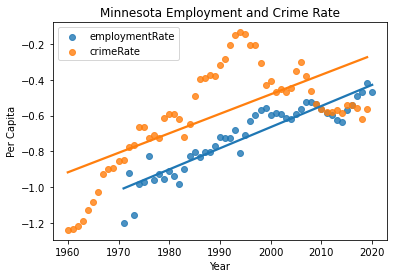

In [34]:
minnesotaEmploy = employment[employment['state_postal_abbr'] == "MN"]
minnesotaCrime = stateCrime[stateCrime['State'] == "Minnesota"]

regMN = seaborn.regplot(x= minnesotaEmploy["data_year"], y= minnesotaEmploy['officer_rate_per_1000'],fit_reg=True, ci=None, label='employmentRate')
regMN =seaborn.regplot(x = minnesotaCrime["Year"], y = minnesotaCrime["Data.Rates.Violent.All"],fit_reg=True, ci=None, label='crimeRate')
regMN.set(ylabel='Per Capita', xlabel='Year', title = "Minnesota Employment and Crime Rate")
regMN.legend()

Finally, Ohio!

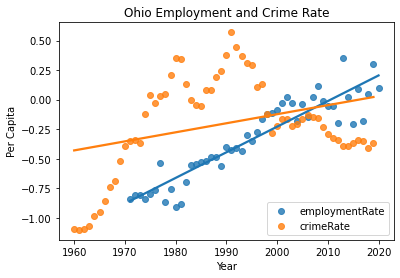

In [36]:
ohioEmploy = employment[employment['state_postal_abbr'] == "OH"]
ohioCrime = stateCrime[stateCrime['State'] == "Ohio"]

regOH = seaborn.regplot(x= ohioEmploy["data_year"], y= ohioEmploy['officer_rate_per_1000'],fit_reg=True, ci=None, label='employmentRate')
regOH =seaborn.regplot(x = ohioCrime["Year"], y = ohioCrime["Data.Rates.Violent.All"],fit_reg=True, ci=None, label='crimeRate')
regOH.set(ylabel='Per Capita', xlabel='Year', title = "Ohio Employment and Crime Rate")
regOH.legend()


### Analysis of above plots

From our visulizations we can draw a few conclusions. 
- For one, Virginia bucks the trend compared to our other states, as the state hires signifigantly more LEOs compared to its violent crime rate than our other states. In Virginia's case, violent crime and LEO employment have a weakly negative correlation.
- In our other states, the correlation is more positive. Prehapes, states increased the number of LEOs to combat higher crime rates, thus the two rise simulataniously.
- In every case, in present day, LEO employment percapita was higher than violent crime per capita, which is good.
- Virginia's case may suggest that states have a point where an increased number of LEOs may suppress crimes, Maryland and Minnesota are yet to hit this threshhold while Ohio is advancing just beyond it into a state similar to Virginia.

### Crime vs Annual Median Income?
**Questions:** Is there a correlation between the annual median income of each household in a state and the number of crimes that occur.

Upon some quick plotting, it became quite clear that there is next to no correlation at least with the datasets we used. We decided to to find additional datasets as we didn't want to fit the data to the question and cherrypick. The R-squared value of the linear regression was incredibly and the points were scattered without visible correlation.

This is documented in the Crime vs Annual Median Income notebook included in our submission.

## Credit Listing
>What each team member contributed to the whole project (all Parts) including any work that was not used in the final report

*   James Chaen Kwok: 
  * Part 1: Gathered everyone's PID and name. Came up with a research question and found some sample datasets.
  * Part 2: Analyzed crime statistics (from three datasets) relating to each state. Performed k-means clustersing on the datasets and DBSCAN to find clusters and see which states are similar to each other in terms of overall crime.
  * Part 3: Attempted to find a correlation between a state's annual median income and the number of crimes committed but no correlation was found. Compiled parts from all member into single report.
*   Ryan Godfrey: 
  * Part 1: Helped come up with questions
  * Part 2: Did analysis of the data sets created by Lauren, and posed more questions for further analysis with these data sets and pointed out the need for datasets with more context.
  * Part 3:
*   Elliot Limanek:
  * Part 1: Helped come up with questions
  * Part 2: Wrote analysis and came up with a follow up question for the group.
  * Part 3: Created a prediction model for the population of states races based off of crimes commited. In order to answer a follow up question. 
*   Lauren Brennan: 
  * Part 1: Helped come up with questions
  * Part 2: Cleaned and merged 3 data sets into one dataframe focussing on crimes, their categories, and the race/sex/age of people who commit them. Created stacked bar graphs for the different crimes on people, properties, and society. Additionally, created general outline for the necessary notebook subsections.
  * Part 3: Created general outline for the notebook's part 3 subsections. Created and clean a data frame based on the 2020 census for further visualization and analysis of 
*   Ryan Gallagher:
  * Part 1: Came up with topic, found datasets and came up with questions.
  * Part 2: Worked with law enforcement employment data, merging two data sets and doing some visualizations of employment data. Worked on analysis section. Obtained access to FBI CDE and provided data sets in excel/csv format.
  * Part 3: Looked at relationshups between LEO employment and crime rates. Used states from our k-means analysis to determine regional employment/crime rate relationships.
*   Nova (Elie) Tchuma: 
  * Part 1: Helped come up with questions
  * Part 2: Wrote additional analysis to datasets along with possible real-world benefits our research could provide.
  * Part 3: Worked to find possible data to examine for second comparisons, as well as contributing analysis.